In [7]:
import pandas as pd
import numpy as np 
import matplotlib as mpl
%matplotlib inline
import matplotlib.pyplot as plt

In [1]:
! pip install tensorflow

     -------------------------------------- 266.3/266.3 MB 4.7 MB/s eta 0:00:00
     -------------------------------------- 439.2/439.2 kB 9.1 MB/s eta 0:00:00
  Using cached gast-0.4.0-py3-none-any.whl (9.8 kB)
     ---------------------------------------- 6.0/6.0 MB 10.1 MB/s eta 0:00:00
     --------------------------------------- 23.2/23.2 MB 12.1 MB/s eta 0:00:00
  Using cached opt_einsum-3.3.0-py3-none-any.whl (65 kB)
     ---------------------------------------- 126.5/126.5 kB ? eta 0:00:00
     ---------------------------------------- 1.7/1.7 MB 15.4 MB/s eta 0:00:00
  Using cached astunparse-1.6.3-py2.py3-none-any.whl (12 kB)
     ---------------------------------------- 1.5/1.5 MB 13.5 MB/s eta 0:00:00
  Using cached google_pasta-0.2.0-py3-none-any.whl (57 kB)
  Using cached google_auth_oauthlib-0.4.6-py2.py3-none-any.whl (18 kB)
  Using cached tensorboard_data_server-0.6.1-py3-none-any.whl (2.4 kB)
  Using cached tensorboard_plugin_wit-1.8.1-py3-none-any.whl (781 kB)
  Using

In [3]:
import tensorflow as tf
from tensorflow import keras

In [4]:
keras.__version__

'2.11.0'

In [5]:
tf.__version__

'2.11.0'

In [23]:
fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test,y_test) = fashion_mnist.load_data()

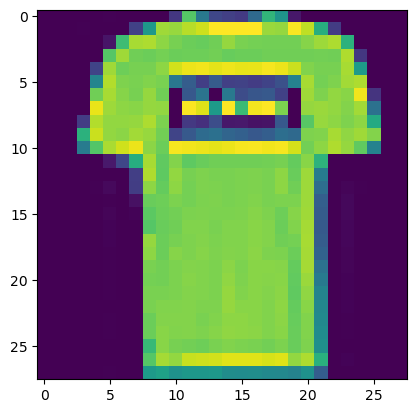

In [24]:
plt.imshow(X_train_full[1])

In [25]:
y_train_full[1]

0

### Creating a list to get the names of items instead of their numbers

In [26]:
class_names = ["T-shirt/top",
"Trouser",
"Pullover",
"Dress",
"Coat",
"Sandal",
"Shirt",
"Sneaker",
"Bag",
"Ankle boot"]

In [27]:
class_names[y_train_full[12]]

'Sandal'

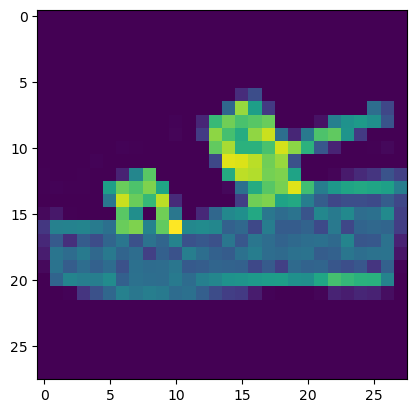

In [28]:
plt.imshow(X_train_full[12])

## Test-Train Split

### Normalization

In [30]:
X_train_n = X_train_full/255.0
X_test_n = X_test/255.0

## Splitting data into Training and validation data

In [33]:
X_valid,X_train = X_train_n[:5000], X_train_n[5000:]
y_valid,y_train = y_train_full[:5000], y_train_full[5000:]
X_test = X_test_n

In [34]:
np.random.seed(42)
tf.random.set_seed(42)

In [37]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28,28]))
## we are converting the 2D arary to 1D array 
model.add(keras.layers.Dense(300, activation = 'relu'))
model.add(keras.layers.Dense(100, activation= 'relu'))
model.add(keras.layers.Dense(10, activation= 'softmax'))

In [38]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 784)               0         
                                                                 
 dense_4 (Dense)             (None, 300)               235500    
                                                                 
 dense_5 (Dense)             (None, 100)               30100     
                                                                 
 dense_6 (Dense)             (None, 10)                1010      
                                                                 
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [40]:
!pip install pydot

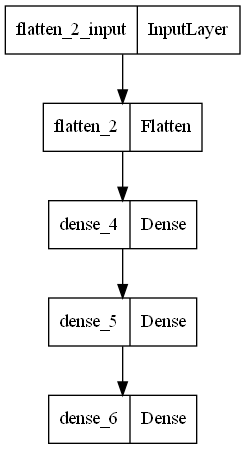

In [42]:
import pydot
keras.utils.plot_model(model)

In [44]:
weights, biases = model.layers[1].get_weights()
weights

array([[-0.01087292, -0.07035658, -0.06683175, ...,  0.00747713,
        -0.04410938,  0.05864599],
       [ 0.017863  , -0.00800077,  0.03190286, ..., -0.0341194 ,
         0.00258593, -0.03368599],
       [-0.00623202,  0.02184475,  0.01978844, ..., -0.07095503,
         0.00866485, -0.06139908],
       ...,
       [ 0.04329014, -0.06620331,  0.05310299, ..., -0.0020547 ,
         0.00444166,  0.04293646],
       [ 0.03965382, -0.00902586, -0.06075447, ...,  0.05516472,
         0.03912231, -0.04053712],
       [-0.02109173,  0.02041285,  0.01465344, ...,  0.03100388,
        -0.04563818,  0.04111792]], dtype=float32)

In [47]:
weights.shape

(784, 300)

In [48]:
biases

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [49]:
biases.shape

(300,)